In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import zscore
import seaborn as sns
import os
import baltic as bt
from function import return_yaxis
import warnings
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure11', exist_ok=True)

# Load raw_data

In [3]:
family = 'THE1_THE1-int'

Dfam_RM = pd.read_csv('../data/TE/{}.annotation.csv'.format(family))
Dfam_RM.index = Dfam_RM['repeat name']
Lift_summary_df = pd.read_csv('../data/Liftover/{}_Liftover.csv'.format(family), index_col=0)
Lift_df = pd.read_csv('../data/Liftover/{}_Liftover_rate.csv'.format(family), index_col=0)
KZFP_df = pd.read_csv('../data/overlap/{}_KZFP.csv'.format(family))
TRIM28_df = pd.read_csv('../data/overlap/{}_TRIM28.csv'.format(family))
tree = bt.loadNewick('../data/phylogenetic tree/{}_reroot.contree'.format(family))

In [4]:
# load TE targets
KZFP_target = pd.read_csv('../data/targets/provirus_targets_for_analysis.csv')
KZFP_target = KZFP_target[(KZFP_target['repeat family name']==family)].sort_values(by='q value')
display(pd.unique(KZFP_target['KZFP gene symbol']))

array(['ZNF707', 'ZNF586', 'ZNF675', 'ZNF585B', 'ZNF679', 'ZNF431',
       'ZNF100', 'ZNF793', 'ZNF766', 'PRDM9'], dtype=object)

# Process raw_data

In [5]:
# modify name from systematic name to reodered name
reorder_dict = {'THE1_THE1-int_1':'THE1_THE1-int_1', 'THE1_THE1-int_0':'THE1_THE1-int_2', 'THE1_THE1-int_2':'THE1_THE1-int_3'}

In [6]:
KZFP_target_fil = KZFP_target[(KZFP_target['KZFP gene symbol'].duplicated()==False) & (KZFP_target['log10 q value']>10)]

In [7]:
# color
color_subfamily_dict = dict()
color_name_dict = dict()

color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink', 'black', 'grey']
branch_list = ['Vertebrata', 'Tetrapoda', 'Amniota', 'Mammalia', 'Theria', 'Eutheria', 'Boreoeutheria', 'Euarchontoglires', 'Primatomorpha', 
               'Primates', 'Haplorrhini', 'Simiiformes', 'Catarrhini', 'Hominoidea', 'Hominidae', 'Homininae', 'Hominini']

subfamily_list = ['THE1_THE1-int_1', 'THE1_THE1-int_0', 'THE1_THE1-int_2']


for i, (subfamily, color) in enumerate(zip(subfamily_list, color_list)):

    color_subfamily_dict[subfamily] = color

        
for i, (subfamily, name) in enumerate(Dfam_RM[['repeat adjusted subfamily name', 'repeat adjusted name']].values):

    if subfamily not in color_subfamily_dict:

        print(subfamily)
        color_name_dict[name] = 'black'
        color_subfamily_dict[subfamily] = 'black'
        
    else:
        
        color_name_dict[name] = color_subfamily_dict[subfamily]

c_func = lambda x: color_name_dict[x.name] if x.name in color_name_dict.keys() else 'black'

# Suppelmentary Figure.12A

In [8]:
### 可視化用のデータを作成する

family = 'THE1_THE1-int'

# position
df = return_yaxis(tree, colour=c_func, size=10).sort_values(by='y', ascending=True)
df.index = range(len(df))

# Dfam
Dfam_RM_dict = Dfam_RM.copy()
Dfam_RM_dict.index = Dfam_RM_dict['repeat name']
Dfam_RM_dict = Dfam_RM_dict.to_dict()

Dfam = Dfam_RM.copy()
Dfam.index = Dfam['repeat adjusted name']
Dfam = Dfam.loc[list(reversed(df['repeat adjusted name'].values.tolist()))]
Dfam.index = Dfam['repeat name']

# binding profile
KZFP_overlap = KZFP_df[KZFP_df['repeat family name']==family]
KZFP_crosstab = pd.crosstab(KZFP_overlap['repeat name'], KZFP_overlap['KZFP gene symbol'])
KZFP_crosstab = pd.concat([Dfam, KZFP_crosstab>=1], axis=1).fillna(0)

# Liftover
LiftOver = Lift_summary_df.loc[Dfam.index]
LiftOver

,Vertebrata,Tetrapoda,Amniota,Mammalia,Theria,Eutheria,Boreoeutheria,Euarchontoglires,Primatomorpha,Primates,Haplorrhini,Simiiformes,Catarrhini,Hominoidea,Hominidae,Homininae,Hominini,Homo sapiens
repeat name,,,,,,,,,,,,,,,,,,
THE1D_THE1D-int_chr4_dup15,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
THE1D_THE1D-int_chr14_dup13,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
THE1D_THE1D-int_chr6_dup3,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
THE1D_THE1D-int_chr14_dup14,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
THE1D_THE1D-int_chr1_dup10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
THE1A_THE1-int_chr13_dup16,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
THE1A_THE1-int_chr9_dup2,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
THE1A_THE1-int_chr13_dup22,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True


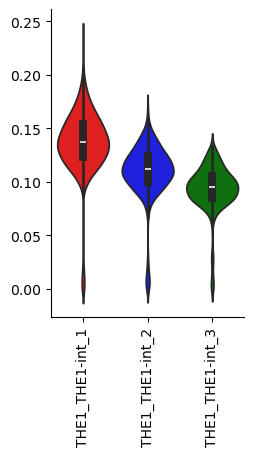

In [9]:
fig = plt.figure(figsize=[2.5, 4])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = Dfam_RM

x = data['repeat adjusted subfamily name']
y = data['branch length']
order = reorder_dict.keys()
pallete = ['red', 'blue', 'green']

sns.violinplot(x=x, y=y, order=order, palette=pallete)

ax.set_xticklabels(reorder_dict.values(), rotation=90)
ax.set_xlabel('subfamily')
ax.set_ylabel('branch length')
ax.set_xlabel('')
ax.set_ylabel('')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Supplementary Figure11/Supplementary Figure11A_branchlength.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure11/Supplementary Figure11A_branchlength.pdf', bbox_inches='tight', transparent=True, dpi=300)


In [10]:
target = KZFP_target_fil[KZFP_target_fil['repeat family name']==family]
target_list = pd.unique(target['KZFP gene symbol'])
target_list

array(['ZNF707', 'ZNF586', 'ZNF675', 'ZNF585B', 'ZNF679', 'ZNF431',
       'ZNF100', 'ZNF793', 'ZNF766', 'PRDM9'], dtype=object)

In [13]:
KZFP_target_fil

,KZFP gene symbol,repeat adjusted subfamily name,target region,ratio,p value,q value,log10 q value,normalized score,rank,overlap peak count to all copies,...,binding rate,repeat family name,repeat class,repeat classification,emergence era of TE subfamily,evolutionary age of TE subfamily,evolutionary age of KZFP for analysis,emergence era of KZFP for analysis,evolutionary age of KZFP in Imbeault et al.,evolutionary age of KZFP in Tribolet-Hardy et al.
47,ZNF707,THE1_THE1-int_2,Int,81.225566,0.000000e+00,3.763892e-255,254.424363,1.0,Primary,329,...,0.067919,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,105.0,Eutheria,105.0,105.0
82,ZNF586,THE1_THE1-int_2,Int,132.489552,0.000000e+00,3.763892e-255,254.424363,1.0,Primary,294,...,0.106214,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,96.0,Boreoeutheria,43.1,96.0
66,ZNF675,THE1_THE1-int_0,Int,102.924635,0.000000e+00,3.763892e-255,254.424363,1.0,Primary,891,...,0.377223,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,29.4,Catarrhini,43.1,29.4
87,ZNF585B,THE1_THE1-int_1,Int,148.206582,0.000000e+00,3.763892e-255,254.424363,1.0,Primary,1453,...,0.284567,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,105.0,Eutheria,105.0,105.0
56,ZNF679,THE1_THE1-int_1,3-LTR,91.688569,0.000000e+00,5.645837e-255,254.248272,1.0,Primary,900,...,0.528790,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,43.2,Simiiformes,43.1,43.2
114,ZNF431,THE1_THE1-int_0,3-LTR,141.195025,0.000000e+00,5.645837e-255,254.248272,1.0,Primary,560,...,0.094835,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,43.2,Simiiformes,43.1,43.2
141,ZNF100,THE1_THE1-int_2,3-LTR,953.334967,0.000000e+00,5.645837e-255,254.248272,1.0,Primary,433,...,0.208574,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,43.2,Simiiformes,43.1,43.2
18,ZNF793,THE1_THE1-int_1,Int,13.782589,5.874015e-210,8.987242e-208,207.046374,1.0,Primary,281,...,0.082550,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,105.0,Eutheria,105.0,105.0
22,ZNF766,THE1_THE1-int_2,3-LTR,32.346003,1.556856e-164,2.381990e-162,161.623060,1.0,Primary,149,...,0.043064,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,43.2,Simiiformes,43.1,43.2
145,PRDM9,THE1_THE1-int_2,3-LTR,3.015373,3.021519e-21,4.622925e-19,18.335083,1.0,Primary,102,...,0.147399,THE1_THE1-int,ERV/LTR,ERVL-MaLR,Simiiformes,43.2,0.0,Homo sapiens,0.0,0.0


THE1_THE1-int {'ZNF586': 'red', 'ZNF679': 'blue', 'ZNF585B': 'green', 'ZNF675': 'purple', 'ZNF707': 'orange', 'ZNF431': 'yellow', 'ZNF100': 'brown', 'ZNF793': 'pink', 'ZNF766': 'cyan'}


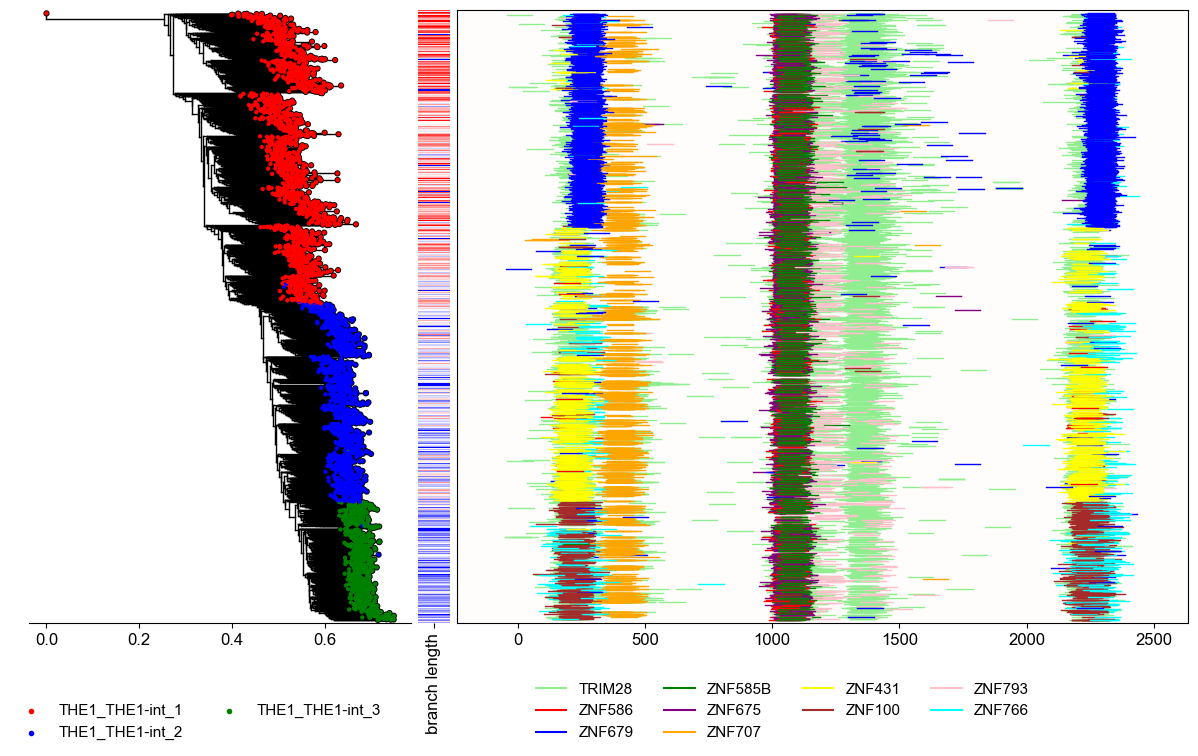

In [14]:
### visualize phylogenetic tree    

fig = plt.figure(figsize=[30, 10])
gs = GridSpec(10, 60)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
    
ax = plt.subplot(gs[2:10, :10])

p1 = tree.plotTree(ax=ax, width=1)
p2 = tree.plotPoints(ax=ax, colour=c_func, size=10)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

[ax.spines[loc].set_visible(False) for loc in ['top','right','left']]

ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])
ax.set_ylim(-20,tree.ySpan+20)
#ax.set_title(family)
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

ylim = p1.get_ylim()

# Legend
legend_elements = []
for i, subfamily in enumerate(reorder_dict.keys()):
    color = color_subfamily_dict[subfamily]
    label = 'THE1_THE1-int_{}'.format(i+1)
    p = ax.scatter([-1], [-1], marker='.', label=label, color=color)

ax.legend(loc=[-0.05, -0.20], ncol=2, fontsize=11, frameon=False)


### visualize TRIM28 and KRAB-ZFP peaks
df = return_yaxis(tree, ax=ax, colour=c_func, size=10).sort_values(by='y', ascending=True)
df.index = range(len(df))
df

ax = plt.subplot(gs[2:10, 11:30])
ax.set_facecolor('seashell')
ax.patch.set_alpha(0.2)

name_order_dict = dict()
for i, (name, y) in enumerate(df[['repeat adjusted name', 'y']].values):

    name_order_dict[name] = y

# TRIM28
TRIM28 = TRIM28_df[TRIM28_df['repeat family name']==family]
for name, summit in TRIM28[['repeat name', 'summit position in repeat alignment']].values:

    adjusted_name = Dfam_RM_dict['repeat adjusted name'][name]
    order = name_order_dict[adjusted_name]
    summit = float(summit)

    x = [summit-50, summit+50]
    y = [order, order]
    ax.plot(x, y, c='lightgreen', linewidth=1)

        
length = 2395

ax.set_xlim(-length*0.1, length*1.1)
ax.set_ylim(ylim[0], ylim[1])
ax.set_yticklabels('')


KZFP = KZFP_df[KZFP_df['repeat family name']==family]
target = KZFP_target_fil[KZFP_target_fil['repeat family name']==family]
target_list = pd.unique(target['KZFP gene symbol'])[:10]

target_list = ['ZNF586', 'ZNF679', 'ZNF585B', 'ZNF675', 'ZNF707', 'ZNF431', 'ZNF100', 'ZNF793', 'ZNF766']

# KZFP
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan', 'grey', 'black']
color_dict = dict()
for i, gene in enumerate(target_list):

    color_dict[gene] = color_list[i%len(color_list)]

print(family, color_dict)


for gene, name, summit in KZFP[['KZFP gene symbol', 'repeat name', 'summit position in repeat alignment']].values:

    adjusted_name = Dfam_RM_dict['repeat adjusted name'][name]
    order = name_order_dict[adjusted_name]
    summit = float(summit)
        
    if gene in color_dict.keys():
        
        x = [summit-50, summit+50]
        y = [order, order]
        color = color_dict[gene]
        ax.plot(x, y, c=color, linewidth=1)

ax.tick_params(left=False)
#ax.legend(color_dict, loc=[0, -0.15], ncol=len(color_dict), fontsize=9)

# Legend
legend_labels = ['TRIM28'] + list(color_dict.keys())
color_dict['TRIM28'] = 'lightgreen'
legend_elements = []
for label in legend_labels:
    p = ax.plot([0], [0], marker='',label=label, color=color_dict[label])

ax.legend(loc=[0.1, -0.2], ncol=4, fontsize=11, frameon=False)


### branch length    
ax = plt.subplot(gs[2:10, 10])

Lift = Dfam.copy()
Dfam.index = Dfam['repeat adjusted name']
data = Dfam.loc[reversed(df['repeat adjusted name'])]
sns.heatmap(zscore(data['branch length'].to_frame()), vmin=-2, center=0, vmax=2, cmap='bwr', ax=ax, cbar=False)

ax.set_yticklabels([])
ax.tick_params(left=False)
ax.set_xticklabels(['branch length'], rotation=90)
ax.set_ylabel('')

plt.rcParams["font.family"] = "Arial"
fig.savefig('../Figure/Supplementary Figure11/Supplementary Figure11A.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure11/Supplementary Figure11A.pdf', bbox_inches='tight', transparent=True, dpi=300)


# Supplementary Figure.12B

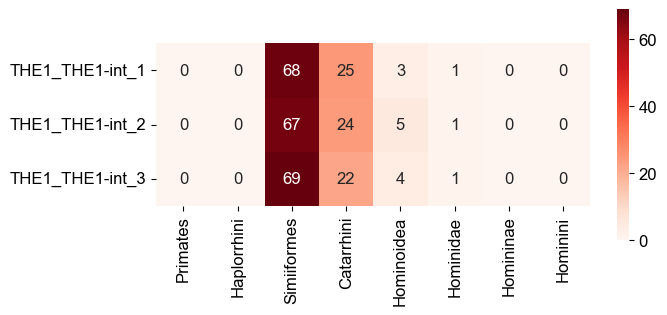

In [15]:
fig = plt.figure(figsize=[7, 3])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

branch_list = ['Vertebrata', 'Tetrapoda', 'Amniota', 'Mammalia', 'Theria', 'Eutheria', 'Boreoeutheria', 'Euarchontoglires', 'Primatomorpha', 
               'Primates', 'Haplorrhini', 'Simiiformes', 'Catarrhini', 'Hominoidea', 'Hominidae', 'Homininae', 'Hominini']

data = Lift_df.loc[reorder_dict.keys()][branch_list[-8:]].astype('int64')
sns.heatmap(data, cmap='Reds', square=True, annot=True, ax=ax)

ax.set_ylabel('')
ax.set_yticklabels(reorder_dict.values())

fig.savefig('../Figure/Supplementary Figure11/Supplementary Figure11B.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure11/Supplementary Figure11B.pdf', bbox_inches='tight', transparent=True, dpi=300)


# Supplementary Figure.12C

In [16]:
# binding profile
KZFP_count = pd.crosstab(KZFP_df['repeat name'], KZFP_df['KZFP gene symbol'])

# merge
Dfam_RM_KZFP = pd.concat([Dfam_RM.loc[reversed(Dfam_RM.index)], KZFP_count], axis=1).fillna(0)

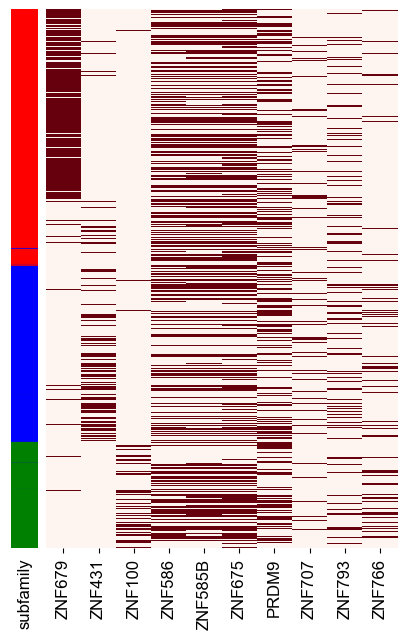

In [17]:
fig = plt.figure(figsize=[5, 7])
gs = GridSpec(7, 11)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

# order
df = return_yaxis(tree, ax=ax, colour=c_func, size=10).sort_values(by='y', ascending=False)
df.index = range(len(df))

# subfamily
ax = plt.subplot(gs[:, :1])

for i, color in enumerate(df['color'].values):

    x = [0, 1]
    y = len(df) - i

    ax.hlines(y, 0, 1, color=color)

ax.set_ylim(0, len(df))
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticks([0.5])
ax.set_xticklabels(['subfamily'], rotation=90)
ax.tick_params(left=False, right=False, bottom=False, top=False)
[ax.spines[loc].set_visible(False) for loc in ['top','right','left', 'bottom']]


# heatmap
ax = plt.subplot(gs[:, 1:])

target_list = ['ZNF679', 'ZNF431', 'ZNF100', 'ZNF586', 'ZNF585B', 'ZNF675', 'PRDM9', 'ZNF707', 'ZNF793', 'ZNF766']
data = Dfam_RM_KZFP[target_list]>=1

sns.heatmap(data, cmap='Reds', cbar=False, ax=ax)

ax.set_ylabel('')
ax.set_yticklabels([])
ax.tick_params(left=False, right=False, top=False)

fig.savefig('../Figure/Supplementary Figure11/Supplementary Figure11C.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure11/Supplementary Figure11C.pdf', bbox_inches='tight', transparent=True, dpi=300)
